# part0: imports

In [1]:
%matplotlib inline

import os, pathlib
from importlib import reload
import logging, warnings
logging.basicConfig(level=logging.ERROR)
warnings.simplefilter("ignore")
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
from IPython.display import clear_output

import pyaldata as pyal

if "__file__" not in dir():
    try:
        NBPath = pathlib.Path.cwd()
        RepoPath = NBPath.parent
        os.chdir(RepoPath)

        from tools import utilityTools as utility
        from tools import dataTools as dt
        
        import params
        reload(params)
        monkey_defs = params.monkey_defs
        defs = monkey_defs

        set_rc =  params.set_rc_params
        set_rc()
        root = params.root

        os.chdir(RepoPath / 'monkey')
        # %run "_dataset-selection.ipynb"

    finally:
        os.chdir(NBPath)

    print('Done')

FIGPATH = params.figPath / 'figS1-monkey-behaviour'
FIGPATH.mkdir(exist_ok=True, parents=True)

Done


---
Get data


In [2]:
raster_example_df = dt.get_example_monkey_data(epoch = monkey_defs.exec_epoch)

---
example monkey trajectories

In [3]:
def plot_traj(ax, df):
    df = pyal.restrict_to_interval(df, epoch_fun=monkey_defs.exec_epoch)
    colors = np.roll(utility.get_colors(monkey_defs.n_targets),3,axis=0)
    for i,traj in enumerate(df.pos):
        color = colors[df.target_id[i]]
        ax.plot(traj[:,0], traj[:,1], color=color, lw=.4)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True, min_n_ticks=3, nbins=3))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, min_n_ticks=3, nbins=3))
    ax.set_xticklabels(np.int16(ax.get_xticks()-ax.get_xticks().min()))
    ax.set_yticklabels(np.int16(ax.get_yticks()-ax.get_yticks().min()))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('$X (mm)$')
    ax.set_ylabel('$Y (mm)$')

---
plot VAF distrbution

In [4]:
def plot_vaf(ax, df, field='MCx_rates', **kwarg):
    n_components = 20
    
    df_ = pyal.restrict_to_interval(df, epoch_fun=defs.exec_epoch)
    
    rates = np.concatenate(df_[field].values, axis=0)
    rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
    
    line = ax.plot(np.arange(1,n_components+1), np.cumsum(rates_model.explained_variance_ratio_), **kwarg)

    ax.set_yticks(np.arange(0,1,.2))
    ax.set_ylim([0,.9])
    ax.set_xticks(np.arange(1,n_components+1,3))
    ax.set_xlabel('Neural modes')
    ax.set_ylabel('VAF')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return line

# Part 2

Plot figure

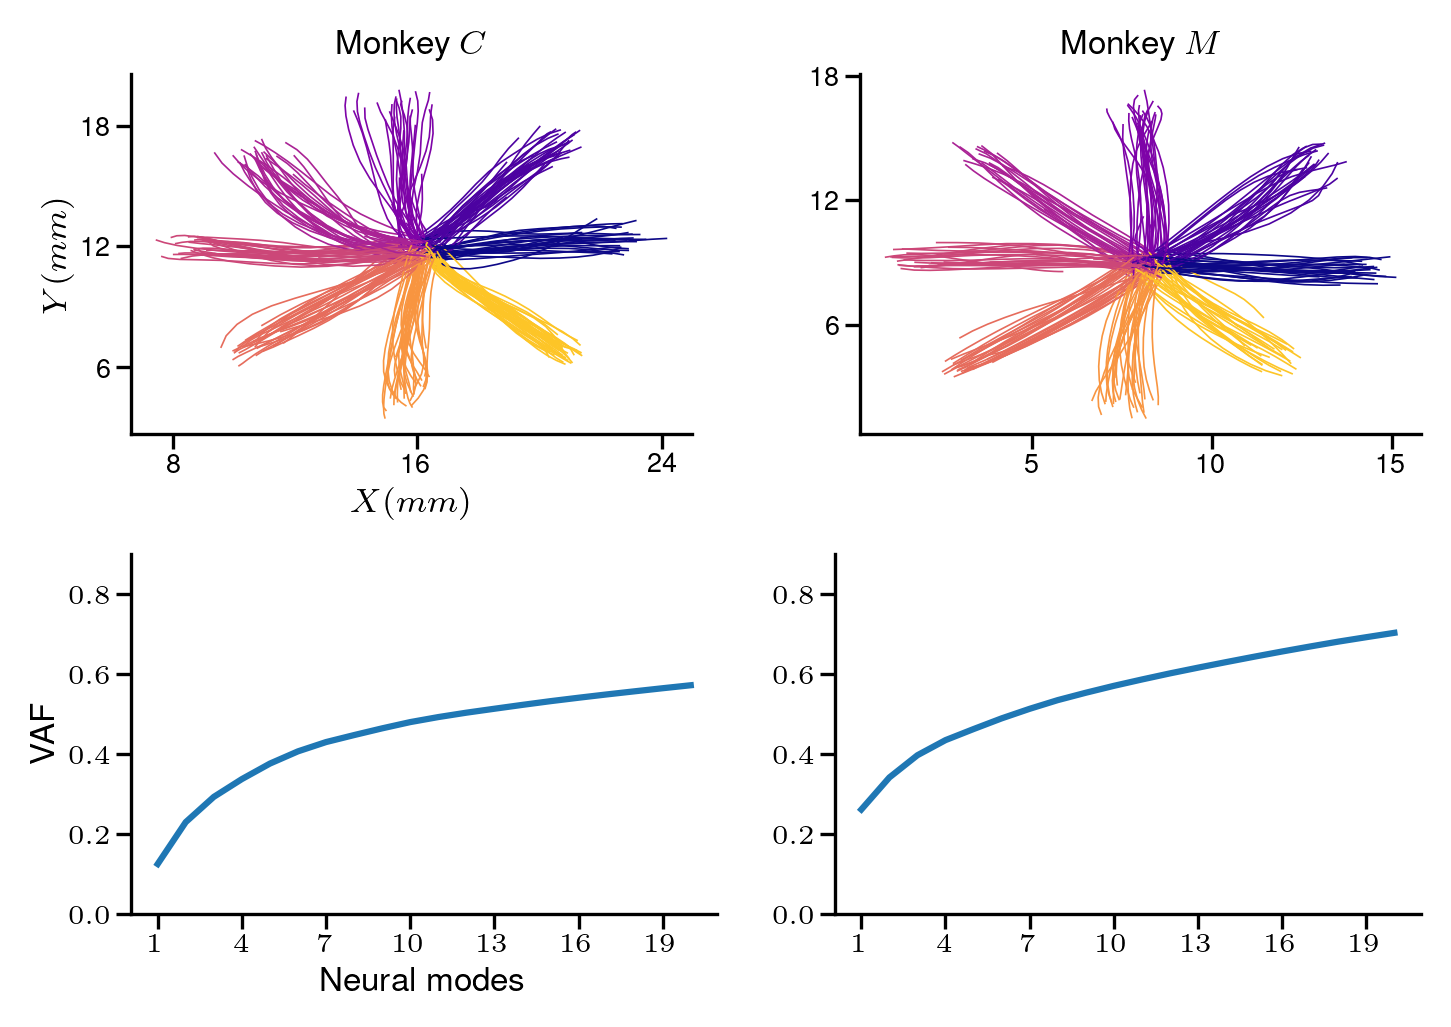

In [6]:
if "__file__" not in dir():
    plt.close('all')
    set_rc()
    figsize=params.MedFig
    fig=plt.figure(figsize=figsize)

    sessionDFs_MCx = dt.get_example_monkey_data(epoch = monkey_defs.exec_epoch)
    
    ##########################################
    # 1: trajectories
    gs1   =utility.add_gridspec_abs(fig, nrows=1, ncols=len(sessionDFs_MCx), left=0, 
                                    bottom=figsize[1]-params.panels.SmallH, 
                                    width=figsize[0], 
                                    height=params.panels.SmallH,
                                    wspace=.3)
    
    axes1=[]
    for i, df in enumerate(sessionDFs_MCx):
        axes1.append(ax:=fig.add_subplot(gs1[i]))
        plot_traj(ax, df)
        ax.set_title(f'Monkey ${df.monkey[0][0]}$')
        if i>0:
            ax.set_ylabel('')
            ax.set_xlabel('')


    ##########################################
    # 3: VAF 
    gs3   =utility.add_gridspec_abs(fig, nrows=1, ncols=len(sessionDFs_MCx), left=0, 
                                    bottom=figsize[1]*gs1.bottom-params.panels.SmallH-.4, 
                                    width=figsize[0], 
                                    height=params.panels.SmallH)
    

    axes3=[]
    for i, df in enumerate(sessionDFs_MCx):
        axes3.append(ax:=fig.add_subplot(gs3[i]))
        plot_vaf(ax, df, field = 'MCx_rates', color=params.colors.MouseM1, zorder = 1)
    
    
    for ax in axes3[1:]:
        ax.set_ylabel('')
        ax.set_xlabel('')
    
    #############################################
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


    
    fig.savefig(FIGPATH / 'figureS1-monkey-behaviour.pdf', format='pdf', bbox_inches='tight')

clear_output()